In [1]:
#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.5/en_core_web_sm-2.2.5.tar.gz
#!pip install https://github.com/abchapman93/spacy_models/raw/master/releases/en_info_3700_i2b2_2012-0.1.0/dist/en_info_3700_i2b2_2012-0.1.0.tar.gz

In [2]:
import spacy
from IPython.display import SVG, YouTubeVideo
from spacy import displacy

# Intro to Clinical NLP
### Instructor: Alec Chapman 
### Email: abchapman93@gmail.com

Welcome to the NLP module! We'll start this module by watching a short introduction of the instructor and of Natural Language Processing (NLP) in medicine. Then we'll learn how to perform clinical NLP in spaCy and will end by applying an NLP system to several clinical tasks and datasets.

### Introduction videos:
- [Meet the Instructor: Dr. Wendy Chapman](https://youtu.be/piJc8RXCZW4)
- [Intro to Clinical NLP / Meet the Instructor: Alec Chapman](https://youtu.be/suVOm0CFX7A)

Slides: [Intro-to-NLP.pdf](https://github.com/Melbourne-BMDS/mimic34md2020_materials/blob/master/slides/Intro-to-NLP.pdf)

# Intro to spaCy

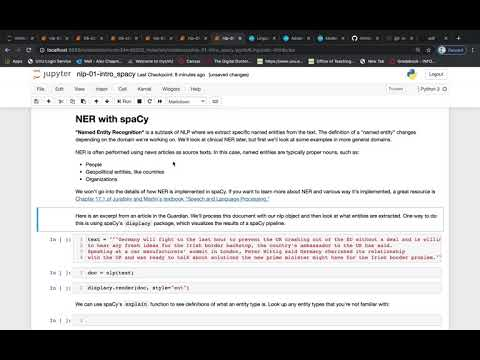

In [3]:
YouTubeVideo("agmaqyUMAkI")

One very popular tool for NLP is [spaCy](https://spacy.io). SpaCy offers many out-of-the-box tools for processing and analyzing text, and the spaCy framework allows users to extend the models for their own purposes. SpaCy consists mostly of **statistical NLP** models. In statistical models, a large corpus of text is processed and mathematical methods are used to identify patterns in the corpus. This process is called **training**. Once a model has been trained, we can use it to analyze new text. But as we'll see, we can also use spaCy to implement sophisticated rules and custom logic. 

SpaCy comes with several pre-trained models, meaning that we can quickly load a model which has been trained on large amounts of data. This way, we can take advantage of work which has already been done by spaCy developers and focus on our own NLP tasks. Additionally, members of the open-source spaCy community can train and publish their own models.


<img alt="SpaCy logo" height="100" width="250" src="https://spacy.io/static/social_default-1d3b50b1eba4c2b06244425ff0c49570.jpg">

# Agenda

- We'll start by looking at the basic usage of spaCy 
- Next, we'll focus on specific NLP task, **named entity recognition (NER)**, and see how this works in spaCy, as well as some of the limitations with clinical data
- Since spaCy's built-in statistical models don't accomplish the tasks we need in clinical NLP, we'll use spaCy's pattern matchers to write rules to extract clinical concepts
- We will then download and use a statistical model to extract clinical concepts from text
- Some of these limitations can be addressed by writing our own rules for concept extraction, and we'll practice that with some clinical texts. We'll then go a little deeper into how spaCy's models are implemented and how we can modify them. Finally, we'll end the day by spaCy models which were designed specifically for use in the biomedical domain.

# spaCy documentation

spaCy has great documentation. As we're going along today, try browsing through their documentation to find examples and instructions. Start by opening up these two pages and navigating through the documentation:

[Basic spaCy usage](https://spacy.io/usage/models)

[API documentation](https://spacy.io/api)

spaCy also has a really good, free online class. If you want to dig deeper into spaCy after this class, it's a great resource for using this library:
https://course.spacy.io/

It's also available on DataCamp (the first two chapters will be assigned for homework): https://learn.datacamp.com/courses/advanced-nlp-with-spacy

# Basic usage of spaCy


In this notebook, we'll look at the basic fundamentals of spaCy:
- Main classes in spaCy
- Linguistic attributes 
- Named entity recognition (NER)

## How to use spaCy
At a high-level, here are the steps for using spaCy:
- Start by loading a pre-trained NLP model
- Process a string of text with the model
- Use the attributes in our processed documents for downstream NLP tasks like NER or document classification

For example, here's a very short example of how this works. For the sake of demonstration, we'll use this snippet of a business news article:

In [4]:
# First, load a pre-trained model
nlp = spacy.load("en_core_web_sm")

In [5]:
# Process a string of text with the model
text = """Taco Bell’s latest marketing venture, a pop-up hotel, opened at 10 a.m. Pacific Time Thursday. 
The rooms sold out within two minutes.
The resort has been called “The Bell: A Taco Bell Hotel and Resort.” It’s located in Palm Springs, California."""

doc = nlp(text)
doc

Taco Bell’s latest marketing venture, a pop-up hotel, opened at 10 a.m. Pacific Time Thursday. 
The rooms sold out within two minutes.
The resort has been called “The Bell: A Taco Bell Hotel and Resort.” It’s located in Palm Springs, California.

In [6]:
# Use the attributes in our processed documents for downstream NLP tasks
# Here, we'll visualize the entities in this text identified through NER
displacy.render(doc, style="ent")

Let's dive a little deeper into how spaCy is structured and what we have to work with.

## SpaCy Architecture
The [spaCy documentation](https://spacy.io/api) offers a detailed description of the package's architecture. In this notebook, we'll focus on these 5 classes:
- `Language`: The NLP model used to process text
- `Doc`: A sequence of text which has been processed by a `Language` object
- `Token`: A single word or symbol in a Doc
- `Span`: A slice from a Doc
- `EntityRecognizer`: A model which extracts mentions of **named entities** from text

# `nlp`
The `nlp` object in spaCy is the linguistic model which will be used for processing text. We instantiate a `Language` class by providing the name of a pre-trained model which we wish to use. We typically name this object `nlp`, and this will be our primary entry point.


In [7]:
nlp = spacy.load("en_core_web_sm")
nlp

The `nlp` model we instantiated above is a **small** ("sm"), **English** ("en")-language model trained on **web** ("web") data, but there are currently 16 different models from 9 different languages. See the [spaCy documentation](https://spacy.io/usage/models) for more information on each of the models.

# Documents, spans and tokens
The `nlp` object is what we'll be using to process text. The next few classes represent the output of our NLP model.

## `Doc` class
The `doc` object represents a single document of text. To create a `doc` object, we call `nlp` on a string of text. This runs that text through a spaCy pipeline, which we'll learn more about in a future notebook.

In [8]:
text = 'Taco Bell’s latest marketing venture, a pop-up hotel, opened at 10 a.m. Pacific Time Thursday.'

In [9]:
doc = nlp(text)

In [10]:
type(doc)

spacy.tokens.doc.Doc

In [11]:
print(doc)

Taco Bell’s latest marketing venture, a pop-up hotel, opened at 10 a.m. Pacific Time Thursday.


## Tokens and Spans
### Token
A `Token` is a single word, symbol, or whitespace in a `doc`. When we create a `doc` object, the text broken up into individual tokens. This is called **"tokenization"**.

**Discussion**: Look at the tokens generated from this text snippet. What can you say about the tokenization method? Is it as simple as splitting up into words every time we reach a whitespace?

In [12]:
token = doc[0]

In [13]:
token

Taco

In [14]:
type(token)

spacy.tokens.token.Token

In [15]:
doc

Taco Bell’s latest marketing venture, a pop-up hotel, opened at 10 a.m. Pacific Time Thursday.

In [16]:
for token in doc:
    print(token)

Taco
Bell
’s
latest
marketing
venture
,
a
pop
-
up
hotel
,
opened
at
10
a.m.
Pacific
Time
Thursday
.


### Span
A `Span` is a slice of a document, or a consecutive sequence of tokens.

In [17]:
span = doc[1:4]

In [18]:
span

Bell’s latest

In [19]:
type(span)

spacy.tokens.span.Span

## Linguistic Attributes
Because spaCy comes with pre-trained linguistic models, when we call `nlp` on a text we have access to a number of linguistic attributes in the `doc` or `token` objects.

### POS Tagging
Parts of speech are categories of words. For example, "nouns", "verbs", and "adjectives" are all examples of parts of speech. Assigning parts of speech to words is useful for downstream NLP texts such as word sense disambiguation and named entity recognition.

**Discussion**: What to the POS tags below mean?

In [20]:
print(f"Token -> POS\n")
for token in doc:
    print(f"{token.text} -> {token.pos_}")

Token -> POS

Taco -> PROPN
Bell -> PROPN
’s -> PART
latest -> ADJ
marketing -> NOUN
venture -> NOUN
, -> PUNCT
a -> DET
pop -> VERB
- -> PUNCT
up -> ADP
hotel -> NOUN
, -> PUNCT
opened -> VERB
at -> ADP
10 -> NUM
a.m. -> NOUN
Pacific -> PROPN
Time -> PROPN
Thursday -> PROPN
. -> PUNCT


In [21]:
spacy.explain("PROPN")

'proper noun'

### Lemma
The **lemma** of a word refers to the **root form** of a word. For example, "eat", "eats", and "ate" are all different inflections of the lemma "eat".

In [22]:
print(f"Token -> Lemma\n")
for token in doc:
    print(f"{token.text} -> {token.lemma_}")

Token -> Lemma

Taco -> Taco
Bell -> Bell
’s -> ’s
latest -> late
marketing -> marketing
venture -> venture
, -> ,
a -> a
pop -> pop
- -> -
up -> up
hotel -> hotel
, -> ,
opened -> open
at -> at
10 -> 10
a.m. -> a.m.
Pacific -> Pacific
Time -> Time
Thursday -> Thursday
. -> .


### Dependency Parsing
In dependency parsing, we analyze the structure of a sentence. We won't spend too much time on this, but here is a nice visualization of dependency parse looks like. Take a minute to look at the arrows between words and try to figure out what they mean.

In [23]:
doc = nlp("The cat sat on the green mat")

In [24]:
displacy.render(doc, style='dep')

### Other attributes
Look at spaCy's [Token class documentation](https://spacy.io/api/token) for a full list of additional attributes available for each token in a document.

# NER with spaCy
**"Named Entity Recognition"** is a subtask of NLP where we extract specific named entities from the text. The definition of a "named entity" changes depending on the domain we're working on. We'll look at clinical NER later, but first we'll look at some examples in more general domains.

NER is often performed using news articles as source texts. In this case, named entities are typically proper nouns, such as:
- People
- Geopolitical entities, like countries
- Organizations

We won't go into the details of how NER is implemented in spaCy. If you want to learn more about NER and various way it's implemented, a great resource is [Chapter 17.1 of Jurafsky and Martin's textbook "Speech and Language Processing."](https://web.stanford.edu/~jurafsky/slp3/17.pdf)

Here is an excerpt from an article in the Guardian. We'll process this document with our nlp object and then look at what entities are extracted. One way to do this is using spaCy's `displacy` package, which visualizes the results of a spaCy pipeline.

In [25]:
text = """Germany will fight to the last hour to prevent the UK crashing out of the EU without a deal and is willing 
to hear any fresh ideas for the Irish border backstop, the country’s ambassador to the UK has said.
Speaking at a car manufacturers’ summit in London, Peter Wittig said Germany cherished its relationship 
with the UK and was ready to talk about solutions the new prime minister might have for the Irish border problem."""

In [26]:
doc = nlp(text)

In [27]:
displacy.render(doc, style="ent")

We can use spaCy's `explain` function to see definitions of what an entity type is. Look up any entity types that you're not familiar with:

In [28]:
spacy.explain("GPE")

'Countries, cities, states'

The last example comes from a political news article, which is pretty typical for what NER is often trained on and used for. Let's look at another news article, this one with a business focus:

In [29]:
# Example 2
text = """Taco Bell’s latest marketing venture, a pop-up hotel, opened at 10 a.m. Pacific Time Thursday. 
The rooms sold out within two minutes.
The resort has been called “The Bell: A Taco Bell Hotel and Resort.” It’s located in Palm Springs, California."""

In [30]:
doc = nlp(text)

In [31]:
displacy.render(doc, style="ent")

## Discussion
Compare how the NER performs on each of these texts. Can you see any errors? Why do you think it might make those errors?

Once we've processed a text with `nlp`, we can iterate through the entities through the `doc.ents` attribute. Each entity is a spaCy `Span`. You can see the label of the entity through `ent.label_`.

In [32]:
for ent in doc.ents:
    print(ent, ent.label_)

Taco Bell ORG
10 a.m. Pacific Time TIME
Thursday DATE
two minutes TIME
The Bell: A Taco Bell Hotel and Resort WORK_OF_ART
Palm Springs GPE
California GPE


# spaCy Processing Pipelines
How does spaCy generate information like POS tags and entities? Under the hood, the `nlp` object goes through a number of sequential steps to processt the text. This is called a **pipeline** and it allows us to create modular, independent processing steps when analyzing text. The model we loaded comes with a default **pipeline** which helps extract linguistic attributes from the text. We can see the names of our pipeline components through the `nlp.pipe_names` attribute:



In [33]:
nlp.pipe_names

['tagger', 'parser', 'ner']

The image below shows a visual representation of this. In this default spaCy pipeline, 
- We pass the text into the pipeline by calling `nlp(text)`
- The text is split into **tokens** by the `tokenizer`
- POS tags are assigned by the `tagger`
- A dependency parse is generated by the `parser`
- Entities are extracted by the `ner`
- a `Doc` object is returned

These are the steps taken in the default pipeline. However, as we'll see later we can add our own processing **components** and add them to our pipeline to do additional analysis.

<img alt="SpaCy logo" src="https://d33wubrfki0l68.cloudfront.net/16b2ccafeefd6d547171afa23f9ac62f159e353d/48b91/pipeline-7a14d4edd18f3edfee8f34393bff2992.svg">

# Clinical Text
Let's now try using spaCy's built-in NER model on clinical text and see what information we can extract.

In [34]:
clinical_text = "76 year old man with hypotension, CKD Stage 3, status post RIJ line placement and Swan.  "

In [35]:
doc = nlp(clinical_text)

In [36]:
displacy.render(doc, style="ent")

### Discussion
- How did spaCy do with this sentence?
- What do you think caused it to make errors in the classifications?

General purpose NER models are typically made for extracting entities out of news articles. As we saw before, this includes mainly people, organizations, and geopolitical entities. We can see which labels are available in spaCy's NER model by looking at the NER component. As you can see, not many of these are very useful for clinical text extraction.

### Discussion
- What are some entity types we are interested in in clinical domain?
- Does spaCy's out-of-the-box NER handle any of these types?

### Let's compare the standard English language model to that of a language model trained on medical texts

In [38]:
mednlp = spacy.load("en_info_3700_i2b2_2012")
meddoc = mednlp(clinical_text)
displacy.render(meddoc, style="ent")

#### This is much improved 

Remember these are statistical models trained on large corpora. But even the largest medical corpus pails in size to the corpora used to train the standard language models. 

# Next Steps
Since spaCy's model doesn't extract the information we need by default, we'll need to do some additional work to extract clinical concepts. In the next notebook, we'll look at how spaCy allows **rule-based NLP** through **pattern matching**.

[nlp-02-medspacy-concept-extraction.ipynb](nlp-02-medspacy-concept-extraction.ipynb)